In [2]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Lets listfy the contents
what_we_covering = [
    "0. An end-to-end scikit-learn workflow",
    "1. Getting data ready",
    "2. Choose the right estimator/algorithm/model for our problem",
    "3. Fit the model/algorithm and use it to make predictions on our data",
    "4. Evaluating a model",
    "5. Improve a model",
    "6. Save and load a trained a model",
    "7. Putting it all together"
]

In [4]:
what_we_covering

['0. An end-to-end scikit-learn workflow',
 '1. Getting data ready',
 '2. Choose the right estimator/algorithm/model for our problem',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained a model',
 '7. Putting it all together']

In [5]:
# Get the data and make it ready to be used in machine learning
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
# X data
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
# y data
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, y_train, x_test, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# shapes of test and training data
X_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [10]:
len(X)

303

In [11]:
# 80% of X
X.shape[0]*0.8

242.4

## We need non-numeric dataset to demonstrate data cleaning process

## 1.1 Make sure its all numerical

In [12]:
car_sales = pd.read_csv("scikit-learn-data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
len(car_sales)

1000

In [14]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [15]:
# Split into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#Split into training and test datasets
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Build Machine Learning model
from sklearn.ensemble import RandomForestRegressor

# Create a model, train and test model
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [17]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [18]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [19]:
# compare car_sales data and transformed_X data in DataFrame format
#car_sales is already a dataframe object
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [20]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [21]:
pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [22]:
# Refit the model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X_train, x_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
# Evaluate the model
model.score(x_test, y_test)

0.3235867221569877

## 1.2 what if there were missing values

1. Fill them with some value (aka imputing)
2. Remove the sample with the missing value altogether

In [24]:
# import car sales missing data
car_sales_missing_data = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [25]:
# Find total missing values
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [26]:
# Get X data
X = car_sales_missing_data.drop("Price", axis=1)
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [27]:
# Get y data
y = car_sales_missing_data["Price"]
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 1000, dtype: float64

In [28]:
# Turn categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transform = ColumnTransformer([("one_hot",
                                 one_hot,
                               categorical_feature)],
                                remainder="passthrough")

transform_X = transform.fit_transform(X)
transform_X




<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [29]:
car_sales_missing_data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [30]:
car_sales_missing_data["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [31]:
# Fill in the "Make" column
car_sales_missing_data["Make"].fillna("missing", inplace=True)

# Fill in the "Colour" column
car_sales_missing_data["Colour"].fillna("missing", inplace=True)

# Fill in the Odometer column
car_sales_missing_data["Odometer (KM)"].fillna(car_sales_missing_data["Odometer (KM)"].mean(), inplace=True)

# Fill in the "Doors" column
car_sales_missing_data["Doors"].fillna(4, inplace=True)

In [32]:
# check dataframe to see the total missing values
car_sales_missing_data.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
# Remove rows with missing Price value
car_sales_missing_data.dropna(inplace=True)

In [34]:
car_sales_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [35]:
len(car_sales_missing_data)

950

In [36]:
# Get X and y data again
X = car_sales_missing_data.drop("Price", axis=1)
y = car_sales_missing_data["Price"]

In [37]:
# Turn categorical into numeric data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_feature)],
                                remainder="passthrough")

transform_X = transformer.fit_transform(X)
transform_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
transform_X = transformer.fit_transform(car_sales_missing_data)
transform_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [39]:
transform_x_to_dataFrame = pd.DataFrame(transformed_X)
transform_x_to_dataFrame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


## Filling missing data with Scikit-Learn

In [40]:
#import missing data
car_sales_missing = pd.read_csv("scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [41]:
#See total number of missing fields in each column
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [42]:
# Drop rows with missing values in Price column (rows with no labels)
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [43]:
# Split data into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [44]:
# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
# Fill missing values with Scikit-Learn
# step 1: Create imputers
from sklearn.impute import SimpleImputer

# Create categorical (Make & Colour) variable imputer
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")

# Create Door column imputer
door_imputer = SimpleImputer(strategy="constant", fill_value=4)

# Create Odometer (KM) column imputer
num_imputer = SimpleImputer(strategy="mean")

# Step 2: Define columns to be imputed
categorical_features = ["Make", "Colour"]
door_featue = ["Doors"]
num_feature = ["Odometer (KM)"]

# step 3:  Transform the columns
from sklearn.compose import ColumnTransformer

imputer = ColumnTransformer([
                     ("cat_imputer", cat_imputer, categorical_features),
                     ("door_imputer", door_imputer, door_featue),
                     ("num_imputer", num_imputer, num_feature)
                    ])

# step 4: Find values to fill and transform training data
filled_X_train = imputer.fit_transform(X_train)

# step 5: Fill values in to the test set with values learned from the training set
filled_X_test = imputer.transform(X_test)
filled_X_train[:5]


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ['Honda', 'White', 4.0, 195829.0],
       ['Honda', 'Blue', 4.0, 219217.0]], dtype=object)

In [46]:
# See first 5 rows
filled_X_test[:5]

array([['Toyota', 'Blue', 4.0, 99761.0],
       ['Toyota', 'Black', 4.0, 17975.0],
       ['Honda', 'Blue', 4.0, 197664.0],
       ['Nissan', 'Green', 4.0, 235589.0],
       ['Honda', 'Black', 4.0, 231659.0]], dtype=object)

In [47]:
# Test to see that missing values are filled
car_sales_filled = pd.DataFrame(filled_X_test,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
                        
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4.0,99761.0
1,Toyota,Black,4.0,17975.0
2,Honda,Blue,4.0,197664.0
3,Nissan,Green,4.0,235589.0
4,Honda,Black,4.0,231659.0


In [48]:
# Total missing values
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [49]:
# Get our transformed data arrays back into Dataframe
filled_X_train_df = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
filled_X_test_df = pd.DataFrame(filled_X_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [50]:
# Check for missing values in training data
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
# Check for missing values in test data
filled_X_test_df.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
# Check to see the original... still missing values
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [53]:
filled_X_train_df.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,71934.0
1,Toyota,Red,4.0,162665.0
2,Honda,White,4.0,42844.0
3,Honda,White,4.0,195829.0
4,Honda,Blue,4.0,219217.0


In [54]:
# one hot encode non-numeric columns (Make, Colour & Doors)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                               remainder="passthrough",
                               sparse_threshold=0)

# Fill train and test values seperately
transformed_X_train = transformer.fit_transform(filled_X_train_df)
transformed_X_test = transformer.transform(filled_X_test_df)

In [55]:
# check transformed and filled X_train
transformed_X_train

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 71934.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 162665.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 42844.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 196225.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 133117.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 150582.0]], dtype=object)

In [56]:
# Check transform filled X_test
transformed_X_test

array([[0.0, 0.0, 0.0, ..., 1.0, 0.0, 99761.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 17975.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 197664.0],
       ...,
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 108569.0],
       [1.0, 0.0, 0.0, ..., 0.0, 0.0, 201190.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 61163.0]], dtype=object)

In [57]:
# Fit a model & evealuate
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Fit model with transformed X data (transformed_X_train) and y_train
model.fit(transformed_X_train, y_train)

# Evaluate model with transformed X data (transformed_X_test) and y_test
model.score(transformed_X_test, y_test)

0.21229043336119102

# 2. Choosing the right algorithm/estimator for our problem
Some things to note:
  * Scikit-Learn refers to machine learning models and algorithms as estimators.
  * Classification problem - predicting a category (heart disease or not).
      * Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
  * Regression problem - predicting a number (selling price of a car).

### 2.1 Picking ML model for regression problem
Let's use the california dataset. https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [58]:
# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [59]:
# Put california housing dataset into pandas dataFrame and/or Series
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
# Add target column
housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [61]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,0.847


In [62]:
housing_df=housing_df.drop("MedHouseVal", axis=1)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [63]:
# How many samples?
len(housing_df)

20640

In [64]:
# Import the Ridge model class from linear_model module
from sklearn.linear_model import Ridge

# setup random seed
np.random.seed(42)

# Split data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge class and fit the model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model on test dataset
# The default score() metric of regression algorithm is R^2
model.score(X_test, y_test)


0.5758549611440126

In [65]:
# Using SVM model
# Import the svm model class 
#from sklearn.svm import SVR

# setup random seed
#np.random.seed(42)

# Split data into features (X) and labels (y)
#X = housing_df.drop("target", axis=1)
#y = housing_df["target"]

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate SVM and fit the model
#model = SVR(kernel='linear', C=1.0, epsilon=0.1)
#model.fit(X_train, y_train)

# Check the score of the model on test dataset
# The default score() metric of regression algorithm is R^2
#model.score(X_test, y_test)

In [66]:
# Import the SVR model
#from sklearn.svm import SVR
#from sklearn.pipeline import make_pipeline

# setup random seed
#np.random.seed(42)

# Split data into features (X) and labels (y)
#X = housing_df.drop("target", axis=1)
#y = housing_df["target"]

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
#regr.fit(X_train, y_train)

# Check the score of the model
#model.score(X_test, y_test)

In [67]:
# Import the LinearSVR model
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# setup random seed
np.random.seed(42)

# Split data into features (X) and labels (y)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = make_pipeline(StandardScaler(), LinearSVR(max_iter=10000, random_state=42))
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.5523192814069144

what if Ridge and SVR didn't work or score didnt fit our needs?

We could try a different model and for that we will try an ensemble model 

Ensemble is a combination of smaller models to try and make a prediction

In [68]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Split data into features (X data) and label (y data)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestRegressor and fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model
model.score(X_test, y_test)

0.806652667101436

### Classification problem
sklearn iris dataset
https://scikit-learn.org/stable/datasets/toy_dataset.html

In [69]:
# import Idris dataset
from sklearn.datasets import load_iris

idris_data = load_iris()
idris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [70]:
# put idris data into pandas datafraom
idris_df = pd.DataFrame(idris_data["data"], columns=idris_data["feature_names"])
idris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
# Create target column
idris_df["target"] = pd.Series(idris_data["target"])
idris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [72]:
# Split data into X and y
X = idris_df.drop("target", axis=1)
y = idris_df["target"]

In [73]:
# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
# import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# model = LinearSVC()
model = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e5 ))
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.4

### 2.2 Choosing estimator for classification problem
Lets go to the map...https://scikit-learn.org/stable/machine_learning_map.html

In [75]:
heart_disease = pd.read_csv("scikit-learn-data/heart-disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

Consulting the map and it says to try LinearSVC

In [77]:
#import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed
np.random.seed(42)

#Split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into test and training datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate model
clf.score(X_test, y_test)

0.8688524590163934

In [78]:
# See number of clasifications
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [79]:
# import LinearSVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# model = LinearSVC()
model = make_pipeline(StandardScaler(),
                     LinearSVC(random_state=0, tol=1e5 ))
model.fit(X_train, y_train)

model.score(X_test, y_test)


0.47540983606557374

In [80]:
# Try Random Forest Classifier
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate estimator
model.score(X_test, y_test)

0.8524590163934426

## 3. Fit the model or algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = features, feature variables, data
* y = target, target variables, labels

In [81]:
# Try Random Forest Classifier
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model to the data (training the ML model)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate estimator (use the patterns the model has learned)
model.score(X_test, y_test)

0.8524590163934426

In [82]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Making predictions using ML model

2 ways to make predictions:
1. predict() function
2. predict_proba() function

In [84]:
# Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
X.shape, X.size

((303, 13), 3939)

In [86]:
# y_test in array format
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8688524590163934

In [88]:
clf.score(X_test, y_test)

0.8688524590163934

In [89]:
 y_preds[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [90]:
np.array(y_test[:5])

array([0, 0, 1, 0, 1], dtype=int64)

In [91]:
np.array(y_test).size, y_preds.size

(61, 61)

In [92]:
# Use accuracy method
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

## predict_proba function returns probabilities of a classification label

In [93]:
# Make predictions with predict_proba() function
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [94]:
# Lets predict on the same data
model.predict(X_test)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

## Using predict() on Regression models

In [95]:
# import RandomForestRegressor class from sklearn.ensemble library, 
# get the data into features and labels, and make predictions
from sklearn.ensemble import RandomForestRegressor

# create Ranom seed
np.random.seed(42)

# create features (X data) and labels (y_data)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model isnatnce
model = RandomForestRegressor()

# Fit the model into the data
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# First 10 elements 
y_preds[:10]


array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [96]:
# First 10 elements of the label data
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [97]:
# length of both predictions and label data
# They are suppose to be the same
len(y_preds), len(y_test)

(4128, 4128)

In [98]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32656738464147306

There are 3 ways yo evaluate Scikit-Learn models/estimators
1. Estimator's built-in score method
2. The scoring parameter
3. Problem specific metric functions

## 4.1 Evaluating model with the score() method

In [99]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Split data inti X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Fit model to data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [100]:
clf.score(X_test, y_test)

0.8524590163934426

In [101]:
clf.score(X_train, y_train)

1.0

Let's use score() on regression problem

In [102]:
# import RandomForestRegressor class from sklearn.ensemble library, 
# get the data into features and labels, and make predictions
from sklearn.ensemble import RandomForestRegressor

# create Ranom seed
np.random.seed(42)

# create features (X data) and labels (y_data)
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model isnatnce
model = RandomForestRegressor(n_estimators=100)

# Fit the model
model.fit(X_train, y_train)



RandomForestRegressor()

In [103]:
# when n_estimators=2
model.score(X_test, y_test)

0.806652667101436

In [104]:
# when n_estimators=50
model.score(X_test, y_test )

0.806652667101436

In [105]:
# when n_estimators=10
model.score(X_test, y_test)

0.806652667101436

In [106]:
# when n_estimators=100
model.score(X_test, y_test)

0.806652667101436

In [107]:
# if every sample in the test values predicted 
# 2.05, we get a score of 0.0
y_test.mean()

2.0550030959302323

4.2 Evaluating a model using the scoring parameter

In [108]:
# Using cross_val_score on classification model
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [109]:
clf.score(X_test, y_test)

0.8524590163934426

In [110]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [111]:
np.random.seed(42)

# Single training and test split with score() method
clf_single_score = clf.score(X_test, y_test) 

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare results
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [112]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [113]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [114]:
np.random.seed(42)
cross_val_score(clf, X, y, cv=5, scoring='accuracy')

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

## 4.2.1 Classification model evaluation metrics
    1. Accuracy
    2. Area under ROC curve
    3. Confusion matrix
    4. Classification report

In [115]:
# 1. Accuracy
# Using cross validation to evaluate model's performance

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# split data into X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# instantiate RandomForestClassifier and set to 100 estimators (This is the default)
clf = RandomForestClassifier(n_estimators=100)

# Use cross_val_score
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [116]:
# mean of cross_val_score
np.mean(cross_val_score)

0.8248087431693989

In [117]:
print(f"Heart disease classifier cross-validated-accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classifier cross-validated-accuracy: 82.48%


*** Area under the receiver operating characteristics curve (AUC/ROC) ***

* Area under curve (AUC)
* ROC curve

ROC curves are a comparison of model's true positive rate (tpr) versus
models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [118]:
#import roc_curve
from sklearn.metrics import roc_curve

# verify train and test dataset by creating them again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions with predict_proba method
y_probs = clf.predict_proba(X_test)

# see first 10 of them
y_probs[:10], len(y_probs)


(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [119]:
# keep only the positive class,
y_probs_positive = y_probs[:, 1]

#see first 10
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [120]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check false positive rates (fpr)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

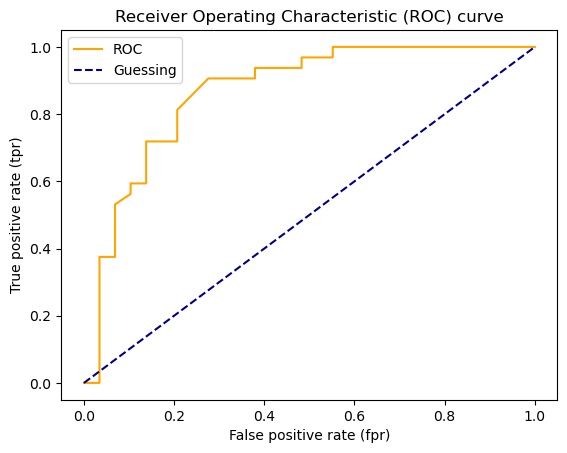

In [121]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rates (fpr)
    and true positive rate (tpr) of a model
    """
    
    # plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

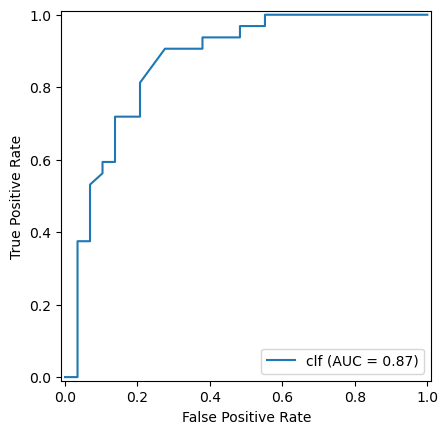

In [122]:
from sklearn import metrics

roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='clf')
display.plot()
plt.show()

In [123]:
# calaculate roc_auc_score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

In [124]:
# perfect AUC score

roc_auc_score(y_test, y_test)

1.0

In [125]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


array([[23,  6],
       [ 6, 26]], dtype=int64)

In [126]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [127]:
# How to install a conda package into the current environment from a jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




<Axes: >

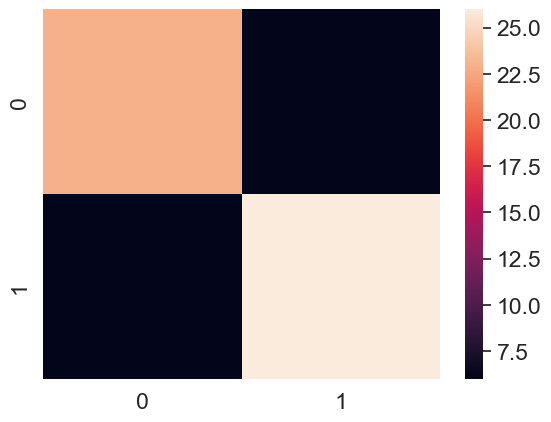

In [128]:
# Make confusion matrix more visual with sseaborn heatmap()
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot conf_mat using seaborn
sns.heatmap(conf_mat)

In [129]:
import sklearn
print(sklearn.__version__)


1.6.1


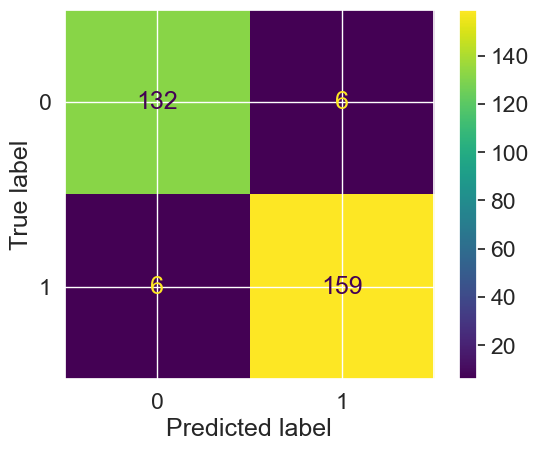

In [130]:
# from estimator
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

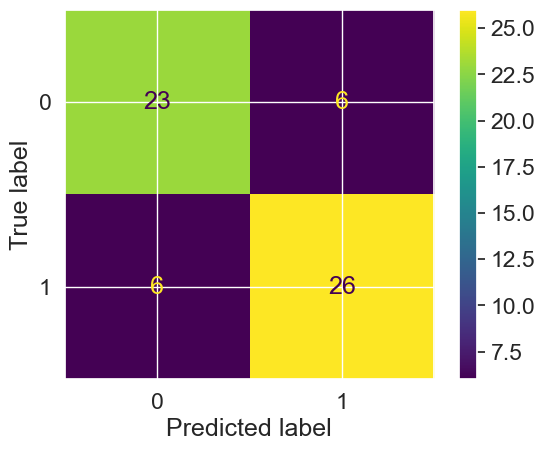

In [131]:
# from predictions
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

# Classification Report

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



## Using the right classification metrics

In [133]:
# scenario where precision and recall become valuable
# create array of 10000 elements abd all with 0 value
disease_true = np.zeros(10000)

# sample with positive test. Make the firsl element positive
disease_true[0] = 1

# model predicts every case as 0
disease_pred = np.zeros(10000)

# create a classifaction report and put in a dataframe
pd.DataFrame(classification_report(disease_true, disease_pred, output_dict=True))

c:\AI-labs\sample-project\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AI-labs\sample-project\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\AI-labs\sample-project\env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model metrics
We will focus on the following:
1. R^2 (r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [134]:
from sklearn.ensemble import RandomForestRegressor

# split data into X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# split data into test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantioate model class
model = RandomForestRegressor(n_estimators=100)

# fit the model
model.fit(X_train, y_train)


RandomForestRegressor()

In [135]:
# Evaluate model
model.score(X_test, y_test)

0.8020074166439581

In [136]:
y_test

17314    2.30800
12078    1.11000
8331     1.24300
7542     1.04600
5019     0.98700
          ...   
205      1.22500
6687     2.60400
11148    1.70700
17062    2.47200
14370    5.00001
Name: target, Length: 4128, dtype: float64

In [137]:
y_test.mean()

2.0561935125968986

In [138]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [139]:
y_test_mean[:10]

array([2.05619351, 2.05619351, 2.05619351, 2.05619351, 2.05619351,
       2.05619351, 2.05619351, 2.05619351, 2.05619351, 2.05619351])

In [140]:
y_test.shape, y_test_mean.shape

((4128,), (4128,))

In [141]:
r2_score(y_true=y_test, y_pred=y_test)

1.0

**Mean absolue error (MAE)**

MAE is the average of the absolute difference between predictions and actual values

It gives you an idea how wrong you models predictions are

In [142]:
# MAE 
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.3275013055959304

In [143]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})
df["Differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,Differences
17314,2.308,2.19931,-0.10869
12078,1.110,1.21509,0.10509
8331,1.243,1.10828,-0.13472
7542,1.046,1.24288,0.19688
5019,0.987,1.44943,0.46243
20133,1.761,1.93534,0.17434
3836,2.436,2.43408,-0.00192
12495,1.575,1.54680,-0.02820
3115,0.917,0.85054,-0.06646
12806,1.356,1.29018,-0.06582


In [144]:
# MAE using formulas
absolute_new = abs(df["Differences"]).mean()
absolute_new

0.3275013055959304

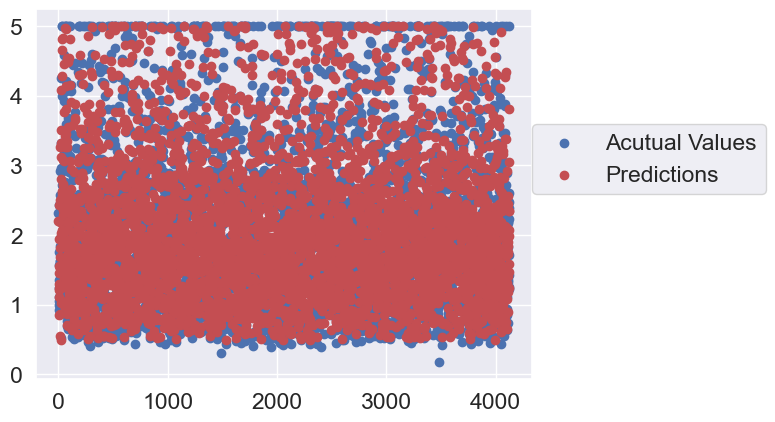

In [145]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predicted values"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5))

**Mean Sqaured Error (MSE)**

MSE is the mean of the square of the errors between actuals and predicted values

In [146]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse


0.2593605384621848

In [147]:
df["squared_differences"] = np.square(df["Differences"])
df.head(10)

,actual values,predicted values,Differences,squared_differences
17314,2.308,2.19931,-0.10869,0.011814
12078,1.110,1.21509,0.10509,0.011044
8331,1.243,1.10828,-0.13472,0.018149
7542,1.046,1.24288,0.19688,0.038762
5019,0.987,1.44943,0.46243,0.213842
20133,1.761,1.93534,0.17434,0.030394
3836,2.436,2.43408,-0.00192,0.000004
12495,1.575,1.54680,-0.02820,0.000795
3115,0.917,0.85054,-0.06646,0.004417
12806,1.356,1.29018,-0.06582,0.004332


In [148]:
# calculate by hand
squared = np.square(df["Differences"])
squared.mean()

0.2593605384621848

In [149]:
# Make a copy of df, Assign the value 20 to rows 1 to 100 and 16 to row 0 
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.iloc[1:100] = 20

In [150]:
df_large_error.head()

,actual values,predicted values,Differences,squared_differences
17314,2.308,2.19931,-0.10869,16.0
12078,20.000,20.00000,20.00000,20.0
8331,20.000,20.00000,20.00000,20.0
7542,20.000,20.00000,20.00000,20.0
5019,20.000,20.00000,20.00000,20.0


## 4.2.3 Scoring parameter

In [151]:
# Using default scoring evaluation metric

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)


In [152]:
np.random.seed(42)

# cross-validation accuracy
# if scoring-None, estimator's default scoring evaluation metric is used, 
# which is accuracy for classification models

cv_acc = cross_val_score(clf, X, y, cv=5,  scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [153]:
# cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.48%


In [154]:
# when scoring=accuracy
np.random.seed(42)

cv_acc = cross_val_score(clf, X, y, cv=5,  scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [155]:
# cross-validated accuracy
print(f"The cross-validated when scoring is set to accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated when scoring is set to accuracy is: 82.48%


In [156]:
# using scoring=precision
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5,  scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [157]:
# cross-validated precision
print(f"The cross-validated when scoring is set to precision is: {np.mean(cv_precision)}")

The cross-validated when scoring is set to precision is: 0.8329547346025924


In [158]:
# using recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5,  scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [159]:
# cross-validated recall
print(f"The cross-validated when scoring is set to recall is: {np.mean(cv_recall)}")

The cross-validated when scoring is set to recall is: 0.8545454545454545


In [160]:
# using f1
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5,  scoring="f1")
cv_f1

array([0.8358209 , 0.90625   , 0.84848485, 0.80597015, 0.81690141])

In [161]:
# cross-validated f1
print(f"The cross-validated when scoring is set to f1 is: {np.mean(cv_f1):.2f}")

The cross-validated when scoring is set to f1 is: 0.84


In [162]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [163]:
%%time    
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
cv_r2

CPU times: total: 3min 44s
Wall time: 3min 52s


array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [164]:
np.mean(cv_r2)

0.6521550148270838

In [165]:

%%time 
np.random.seed(42)
cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross-validated MAE score is: {np.mean(cv_mae):.2f}")

The cross-validated MAE score is: -0.47
CPU times: total: 3min 44s
Wall time: 3min 52s


In [166]:
cv_mae

array([-0.54254038, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

In [167]:
np.mean(cv_mae)

-0.4662085337112404

In [168]:
%%time 
np.random.seed(42)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross-validated MSE score is: {np.mean(cv_mse):.2f}")

The cross-validated MSE score is: -0.43
CPU times: total: 3min 45s
Wall time: 3min 52s


In [169]:
cv_mse

array([-0.51899364, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [170]:
np.mean(cv_mse)

-0.4300986573544397

## 4.3 Using different evaluation metrics asScikit-Learn functions
The 3rd way to evaluate scikit-learn machine learning models/estimators is to use the sklearn.metrics module

In [171]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create model
clf = RandomForestClassifier(n_estimators=100)

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation function
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


In [172]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100, 
                              n_jobs=-1)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25


## 5. Improving a model
First predictions = baseline predictions
First model = baseline model

From a data perspective
* Could we collect more data? (generally, the more the data, the better)
* Could we improve our data?

From a model perspective
* Is there a better model we could use?
* Could we improve the current model?

Hyperparametrs vs Paramters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to potentially improve its ability to find patterns

3 Ways to adjust hyperparameters:
1. By Hand
2. Randomly with sklearn.model_selection.RandomizedSearchCV
3. Exhaustively with sklearn.model_selection.GridSearchCV

In [175]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test splits

We will adjust the following hyperparameters:
* max_depth
* max_features
* min_samples_leafs
* min_samples_split
* n_estimators

In [176]:
def evaluate_preds(y_true: np.array, y_preds: np.array):
    """
    Perform evaluation comparison on y_true labels vs. y_pred labels
    on a classification
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dict
    

In [177]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [178]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [179]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# shuffle data
hyperparam_heart_disease = pd.read_csv("heart-disease.csv")
hyperparam_heart_disease_shuffled = hyperparam_heart_disease.sample(frac=1)

# Split data into X and y
X = hyperparam_heart_disease_shuffled.drop("target", axis=1)
y = hyperparam_heart_disease_shuffled["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

# n_estimators=100
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 75.56%
Precision: 0.74
Recall: 0.77
F1 score: 0.76


{'accuracy': 0.76, 'precision': 0.74, 'recall': 0.77, 'f1': 0.76}

In [180]:
# Check the sizes of the splits
print(f"Training data: {len(X_train)} samples, {len(y_train)} labels")
print(f"Validation data: {len(X_valid)} samples, {len(y_valid)} labels")
print(f"Testing data: {len(X_test)} samples, {len(y_test)} labels")

Training data: 212 samples, 212 labels
Validation data: 45 samples, 45 labels
Testing data: 46 samples, 46 labels


In [181]:
# n_estimators=200
clf2 = RandomForestClassifier(n_estimators=200)
clf2.fit(X_train, y_train)

# Make predictions
y_preds = clf2.predict(X_valid)

# Evaluate the classifier
clf2_baseline_metrics = evaluate_preds(y_valid, y_preds)
clf2_baseline_metrics

Acc: 73.33%
Precision: 0.73
Recall: 0.73
F1 score: 0.73


{'accuracy': 0.73, 'precision': 0.73, 'recall': 0.73, 'f1': 0.73}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [182]:
# Hyperparameter grid RandomizedSearchCV will search over
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")

There are 1440 potential combinations of hyperparameters to test.


In [183]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available cores on your machine (if this causes errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV 
n_iter = 30 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train);

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   1.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   1.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   0.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=500; total time=   2.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=8, min_samples_split=2, n_estimators=50

In [184]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 30}

In [185]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


### 5.3 Hyperparameter tuning with GridSearchCV

In [186]:
param_distributions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt', 'log2', None],
 'min_samples_split': [2, 4, 6, 8],
 'min_samples_leaf': [1, 2, 4, 8]}

In [187]:
# Create hyperparameter grid similar to rs_clf.best_params_
param_grid = {"n_estimators": [200, 1000],
              "max_depth": [30, 40, 50],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8],
              "min_samples_leaf": [4]}

In [188]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")

There are 24 combinations of hyperparameters to test.
This is 60.0 times less than before (previous: 1440).


In [189]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all available machine cores (if this produces errors, try n_jobs=1)
clf = RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

# Find the running time
end_time = time.time()

# How long did it take? 
total_time = end_time - start_time
print(f"[INFO] The total running time for running GridSearchCV was {total_time:.2f} seconds.")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=1000; total time=   5.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=

In [190]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [191]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

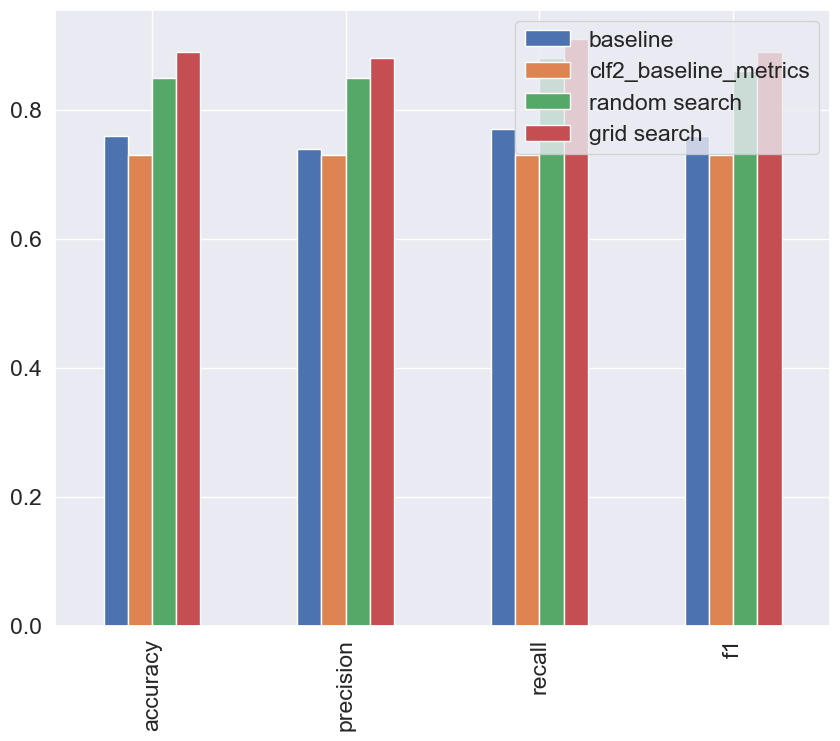

In [192]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf2_baseline_metrics": clf2_baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

In [193]:
import xgboost
print(xgboost.__version__)

2.1.1


In [209]:
# Start the timer
import time
start_time = time.time()

import xgboost as xgb

xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}
n=100
model = xgb.train(params=params,
		  dtrain=xgb_train,
		  num_boost_round=n,
          evals=None,
          verbose_eval=True
        )

end_time = time.time()
total_time = end_time - start_time

print(f"[INFO] The total running time for running XGBoost was {total_time:.2f} seconds.")

[INFO] The total running time for running XGBoost was 0.24 seconds.


In [210]:
xg_preds = model.predict(xgb_test).round()
xg_preds

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [211]:
xgboost_metrics = evaluate_preds(y_test, xg_preds)
xgboost_metrics

Acc: 83.61%
Precision: 0.87
Recall: 0.81
F1 score: 0.84


{'accuracy': 0.84, 'precision': 0.87, 'recall': 0.81, 'f1': 0.84}

## 6. Saving and loading tarined ML models

Two ways to save and load ML models:
1. Python's pickle module
2. With joblib module

In [212]:
import pickle

# Save an existing model to file
best_model_file_name_pickle = "gs_random_forest_model_1.pkl" # .pkl extension stands for "pickle"
pickle.dump(gs_clf, open(best_model_file_name_pickle, "wb"))

In [214]:
# Load a saved model
loaded_pickle_model = pickle.load(open(best_model_file_name_pickle, "rb"))

In [215]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

loaded_pickle_model_metrics == gs_metrics

***Using joblib***

In [217]:
from joblib import dump, load

# Save a model to file
best_model_file_name_joblib = "gs_random_forest_model_1.joblib"
dump(gs_clf, filename=best_model_file_name_joblib)

['gs_random_forest_model_1.joblib']

In [218]:
# Import a saved joblib model
loaded_joblib_model = load(filename=best_model_file_name_joblib)

In [219]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Acc: 88.52%
Precision: 0.88
Recall: 0.91
F1 score: 0.89


{'accuracy': 0.89, 'precision': 0.88, 'recall': 0.91, 'f1': 0.89}

In [220]:
loaded_joblib_model_metrics == gs_metrics

True